#**Desafío 3: Naive Bayes**

##Francisca Pinto González
###10 de octubre de 2021

##**Parte 1**

In [1]:
#----------------------------Google Colab---------------------------------------

!pip install ipython-autotime

#------------------------------Biblioteca---------------------------------------
#tiempo de ejecución
%load_ext autotime

#dataframe y arrays
import pandas as pd
import numpy as np

#estadística
import scipy.stats as stats

#gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#gama matplotlib para facilitar escritura de código
%matplotlib inline

#entrenamiento
from sklearn.model_selection import train_test_split

#sklearn resumen preprocesamiento y entrenamiento
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer

#clasificadores
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

#tokenizador
from sklearn.feature_extraction.text import CountVectorizer

#trabajo con archivos múltiples en carpetas
import glob
import os

time: 864 ms (started: 2021-10-10 22:43:44 +00:00)


In [2]:
#AUX: montar archivos y carpetas desde Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 1.91 ms (started: 2021-10-10 22:43:50 +00:00)


In [3]:
plt.style.use("seaborn") #tipo de gráfico, estilo

time: 2.84 ms (started: 2021-10-10 22:43:54 +00:00)


In [7]:
#para Jupyter Notebook

colab_folderpath = os.getcwd()
colab_files = glob.glob(colab_folderpath + "Apoyo desafío/dump/*.csv")

files_list = []

for i in colab_files:

  tmp = pd.read_csv(i)
  files_list.append(tmp)

df = pd.concat(files_list, axis = 0)

df.head()

time: 5.2 ms (started: 2021-10-10 22:44:50 +00:00)


In [27]:
#modificaciones para Google Colab

colab_folderpath = "/content/drive/MyDrive/ADL/3_Intro ML/Desafío 3_ Naive Bayes/" #en Colab no se puede utilizar os.getcwd()
colab_files = glob.glob(colab_folderpath + "Apoyo desafío/dump/*.csv")

files_list = []

for i in colab_files:

  tmp = pd.read_csv(i)
  files_list.append(tmp)

df = pd.concat(files_list, axis = 0)

df.drop(columns = "Unnamed: 0", inplace = True)
df.rename(columns = {"0" : "Artist",
                     "1" :"Genre",
                     "2" : "Song",
                     "3" : "Lyrics"},
          inplace = True)

df.reset_index(drop = True)

,Artist,Genre,Song,Lyrics
0,Michael Jackson,pop,Ain't No Sunshine,Spoken Intro: \n You ever want something \n Th...
1,Michael Jackson,pop,I Wanna Be Where You Are,Can it be I stayed away too long \n Did I leav...
2,Michael Jackson,pop,Girl Don't Take Your Love From Me,"Ooh \n Foolish of me, I couldn't see \n The fo..."
3,Michael Jackson,pop,In Our Small Way,Maybe you and I can't do great things \n We ma...
4,Michael Jackson,pop,Got To Be There,"Got to be there, got to be there \n In the mor..."
...,...,...,...,...
9484,Nicki Minaj,pop,Wutchoo Know,Chin checker I'm da chin checker \n It was a q...
9485,Nicki Minaj,pop,Yardie Bea,"I can be selfish \n Yeah, so impatient \n Some..."
9486,Nicki Minaj,pop,Yasss Bish,"(Hook 1: Soulja Boy) \n Yasss, bish, yasss (x1..."
9487,Nicki Minaj,pop,Young Money Ballaz,(Lil Wayne Talking) \n Chyea! Young Mula Baby!...


time: 489 ms (started: 2021-10-10 22:58:36 +00:00)


In [28]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9489 entries, 0 to 281
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Artist  9489 non-null   object
 1   Genre   9489 non-null   object
 2   Song    9489 non-null   object
 3   Lyrics  9489 non-null   object
dtypes: object(4)
memory usage: 370.7+ KB
time: 18 ms (started: 2021-10-10 22:58:45 +00:00)


Comentarios:

1. Luego de concatenar todos los archivos en un solo DataFrame, se renombran las columnas y posteriormente se revisa si tienen datos nulos o no. Se comprueba que todas las filas contienen la información necesaria.
2. Se continúa revisando los artistas según género y graficando la cantidad de canciones por cada uno.

In [56]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.groupby("Artist")["Genre"].value_counts().sort_values(ascending = False).to_frame())

                                 Genre
Artist                   Genre        
Eminem                   hiphop    493
Bruce Springsteen        rock      467
Bob Dylan                rock      447
Britney Spears           pop       323
Nicki Minaj              pop       282
Michael Jackson          pop       279
Kanye West               hiphop    273
The Beatles              rock      265
Ghostface Killah         hiphop    255
The Smashing Pumpkins    rock      254
Weezer                   rock      251
Mobb Deep                hiphop    231
Red Hot Chili Peppers    rock      226
Kiss                     rock      219
The Doors                rock      214
Public Enemy             hiphop    198
Megadeth                 metal     190
Queen                    rock      188
Iron Maiden              metal     185
Raekwon                  hiphop    184
De La Soul               hiphop    174
Cannibal Corpse          metal     171
Anthrax                  metal     170
Rush                     

Text(0, 0.5, 'Cantidad de canciones')

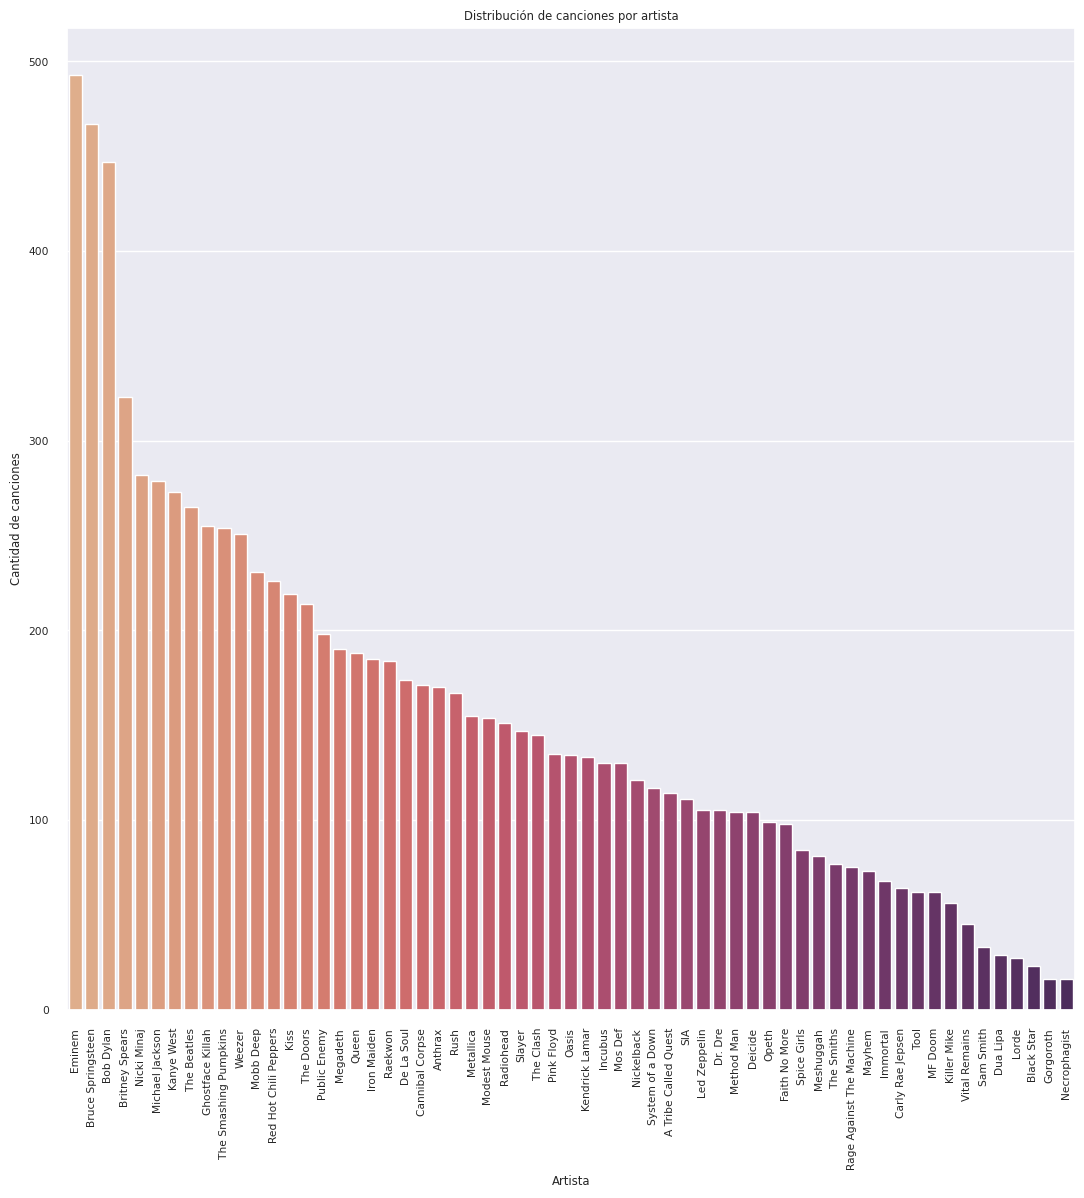

time: 2.83 s (started: 2021-10-10 23:17:22 +00:00)


In [47]:
sns.set(font_scale = 0.7) #escalar fuente para acomodar a gráfico
plt.rcParams["figure.figsize"] = (13, 13) #escalar gráficos
plt.rcParams["figure.dpi"] = 100 #DPI gráficos (también modifica tamaño)
plt.tight_layout()

sns.countplot(x = "Artist",
              data = df,
              order = df["Artist"].value_counts().index,
              palette = "flare")
plt.xticks(rotation = 90)

plt.title(f"Distribución de canciones por artista")
plt.xlabel("Artista")
plt.ylabel("Cantidad de canciones")


Comentarios:
1. Variado, los lugares se reparten, salvo metal que parte más abajo.

In [116]:
count_vectorizer = CountVectorizer(stop_words = "english")

count_vectorizer_fit = count_vectorizer.fit_transform(list(df["Lyrics"]))

words = count_vectorizer.get_feature_names() #extrae términos

words_freq = count_vectorizer_fit.toarray().sum(axis = 0) #extrae frecuencias de cada término

time: 4.74 s (started: 2021-10-11 01:01:22 +00:00)


In [117]:
words_freq_df = pd.DataFrame(data = words_freq,
                             index = words)

time: 27.1 ms (started: 2021-10-11 01:01:31 +00:00)


In [88]:
words_freq_df.rename(columns = {0 : "Frecuency"},
                     inplace = True)

time: 5.97 ms (started: 2021-10-10 23:49:05 +00:00)


In [93]:
words_freq_df.sort_values(by = ["Frecuency"],
                          ascending = False,
                          inplace = True)

time: 23 ms (started: 2021-10-11 00:03:26 +00:00)


In [97]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(words_freq_df.iloc[: 100])

           Frecuency
like           19629
don            17398
know           14962
got            14171
just           13978
love           11268
yeah           11071
ll             10028
oh              9879
cause           8356
time            8037
let             8009
come            7866
man             7467
ain             7323
make            6821
baby            6735
want            6698
say             6684
right           6207
shit            6128
ve              5924
way             5713
life            5710
wanna           5356
gonna           5121
yo              4859
feel            4704
need            4579
fuck            4537
tell            4533
nigga           4334
em              4292
ya              4222
day             4217
away            4126
world           4106
good            3910
think           3902
night           3835
look            3805
little          3708
said            3692
girl            3618
hey             3341
gotta           3272
won          

Comentarios:

1. Luego de realizar el procedimiento para crear un DataFrame con la ocurrencia de palabras de todos los géneros, se creará una función para hacerlo por cada género para segmentar y comentar resultados en cada caso.

In [103]:
df.loc[df["Genre"] == "pop"]["Lyrics"]

0      Spoken Intro: \n You ever want something \n Th...
1      Can it be I stayed away too long \n Did I leav...
2      Ooh \n Foolish of me, I couldn't see \n The fo...
3      Maybe you and I can't do great things \n We ma...
4      Got to be there, got to be there \n In the mor...
                             ...                        
277    Chin checker I'm da chin checker \n It was a q...
278    I can be selfish \n Yeah, so impatient \n Some...
279    (Hook 1: Soulja Boy) \n Yasss, bish, yasss (x1...
280    (Lil Wayne Talking) \n Chyea! Young Mula Baby!...
281    Jay sean \n NIcki Minaj \n Remix \n Damn baby,...
Name: Lyrics, Length: 1232, dtype: object

time: 12.3 ms (started: 2021-10-11 00:28:28 +00:00)


In [106]:
list(df.Genre.unique())

['pop', 'rock', 'hiphop', 'metal']

time: 5.29 ms (started: 2021-10-11 00:29:49 +00:00)


In [113]:
for i in list(df.Genre.unique()):
  print(i)

pop
rock
hiphop
metal
time: 9.68 ms (started: 2021-10-11 00:47:31 +00:00)


In [137]:
count_vectorizer = CountVectorizer(stop_words = "english")

def item_by_cat(dataframe, items, category):

  tmp = dataframe

  cat_list = list(tmp[category].unique()) #lista con las categorías a través de las cuales se clasificarán términos

  for i in cat_list:

    count_vectorizer_fit = count_vectorizer.fit_transform(list(tmp.loc[tmp[category] == i][items]))

    items_names = count_vectorizer.get_feature_names() #extrae términos

    items_freq = count_vectorizer_fit.toarray().sum(axis = 0) #extrae frecuencias de cada término

    items_freq_df = pd.DataFrame(data = items_freq,
                                index = items_names)
    
    items_freq_df.rename(columns = {0 : "Frecuency"},
                          inplace = True)

    items_freq_df.sort_values(by = ["Frecuency"],
                              ascending = False,
                              inplace = True)

#    return print(f"DataFrame {i}"), display(items_freq_df)

time: 25 ms (started: 2021-10-11 01:25:59 +00:00)


In [138]:
item_by_cat(df, "Lyrics", "Genre")

12268

time: 464 ms (started: 2021-10-11 01:26:02 +00:00)
